In [23]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# %matplotlib widget
# import pretty_errors
import sys
sys.path.append('/home/zhouzb/')
import illustris_python as il

# tng_barID = np.load('/Raid0/zhouzb/TNG/barredID_4WP_TNG.npy')
# il1_barID = np.load('/Raid0/zhouzb/il1_data/barredID_il1.npy')


tng_big = 172650
il1_big = 206714
tng_sml = 428289
il1_sml = 382757

# tng_sml = 428289
# tng_smID = 407021
# il1_smID = 449253



bbox = dict(boxstyle="round", fc="1")
# plt.annotate('text', (0.5, 0.5), xytext = (0.5, 0.5), textcoords = 'offset points', bbox = bbox)#, arrowprops = arrowprops)



def rothalo(coor, Jz):
    '''
    set halo's angular momentum as z axis
    '''
    rot = RotMatrix(Norm(Jz))

    for i in range(len(coor)):
        coor[i] = np.dot(rot, coor[i])    

    return coor

#Vector Normalized
def Norm(vect):
    '''Input a vector, normalize it in-place'''
    mol=np.linalg.norm(vect)
    vect /= mol
    return vect

#Find the rotation matrix when input vector rotated to z_axis
def RotMatrix(vect):
    '''Input a vector, return a (3,3) rotation matrix '''
    x=vect[0]
    y=vect[1]
    z=vect[2]

    sinA= y/(z**2+y**2)**0.5
    cosA= z/(z**2+y**2)**0.5
    sinB= x/(x**2+(y*sinA+z*cosA)**2)**0.5
    cosB= (y*sinA+z*cosA)/(x**2+(y*sinA+z*cosA)**2)**0.5

    return np.array([[cosB, -sinA*sinB, -cosA*sinB], [0, cosA, -sinA], [sinB, sinA*cosB, cosA*cosB]])

def coorInfo(simu, snapnum, haloID, size = 6):
    # data = il.func.loadgalaxy(simu, snapnum, haloID, partType=4, fields=['Coordinates', 'Masses', 'Velocities', 'GFM_StellarFormationTime'])
    data = il.func.loadgalaxy(simu, snapnum, haloID, partType=4, fields=['Coordinates', 'Masses', 'Velocities', 'GFM_StellarFormationTime'])
    coor= data['Coordinates']
    mas = data['Masses']
    vel = data['Velocities']
    sf_time = data['GFM_StellarFormationTime']
    half_r = (il.func.loadSubhalos(simu, snapnum, 'SubhaloHalfmassRadType'))[haloID,4]
    is_star = (sf_time>=0.0) # don't use wind particles

    r = coor - coor[0]
    dis = ((r**2).sum(1))**0.5
    inside = dis < (half_r * size)

    vel = vel[(inside & is_star)]
    mas = mas[(inside & is_star)]
    coor = r[(inside & is_star)]
    coor[coor > 37500] -= 75000
    coor[coor < -37500] += 75000
    #Calculate angular momentum
    V = np.sum(vel * mas[:, np.newaxis], 0) / mas.sum()
    vel = vel - V
    L = np.sum(np.cross(coor, vel * mas[:, np.newaxis]), axis=0)
    #Set halo's angular momentum Jz as z axis
    coor = rothalo(coor, L)
    return coor


tng_sMass = il.func.loadSubhalos('TNG', 99, 'SubhaloMassType')[:, 4] / 0.6774
il1_sMass = il.func.loadSubhalos('il1', 135, 'SubhaloMassType')[:, 4] / 0.704

tng_half_r = (il.func.loadSubhalos('TNG', 99, 'SubhaloHalfmassRadType'))[:,4]
il1_half_r = (il.func.loadSubhalos('il1', 135, 'SubhaloHalfmassRadType'))[:, 4]

In [68]:
def fig1():
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    coor = coorInfo('TNG', 99, tng_big)
    myBins = 150
    ax[0][0].hist2d(coor[::2, 0], coor[::2, 1], myBins, norm=LogNorm(0.035), cmap='jet')
    ax[0][0].set_title('TNG-100 subhalo %d' % tng_big, fontsize=15)
    ax[0][0].annotate(r'$M_*\sim10^{11.5}$', (10, 25), xytext = (10, 26), textcoords = 'offset points', bbox = bbox, fontsize=14)
    ax[0][0].set_xlim(-40, 40)
    ax[0][0].set_ylim(-40, 40)

    coor = coorInfo('il1', 135, il1_big)
    ax[0][1].hist2d(coor[::2, 0], coor[::2, 1], myBins, norm=LogNorm(0.035), cmap='jet')
    ax[0][1].set_title('Illustris-1 subhalo %d' % il1_big, fontsize=15)
    ax[0][1].annotate(r'$M_* \sim 10^{11.5}$', (10, 25), xytext = (10, 26), textcoords = 'offset points', bbox = bbox, fontsize=14)
    ax[0][1].set_xlim(-40, 40)
    ax[0][1].set_ylim(-40, 40)

    coor = coorInfo('TNG', 99, tng_sml)
    ax[1][0].hist2d(coor[::2, 0], coor[::2, 1], myBins, norm=LogNorm(0.035), cmap='jet')
    ax[1][0].set_title('TNG-100 subhalo %d' % tng_sml, fontsize=15)
    ax[1][0].annotate(r'$M_* \sim 10^{10.8}$', (6.7, 17.6), xytext = (7, 15), textcoords = 'offset points', bbox = bbox, fontsize=14)
    ax[1][0].set_xlim(-25, 25)
    ax[1][0].set_ylim(-25, 25)

    coor = coorInfo('il1', 135, il1_sml)
    ll = ax[1][1].hist2d(coor[::2, 0], coor[::2, 1], myBins, norm=LogNorm(0.035), cmap='jet')
    ax[1][1].set_title('Illustris-1 subhalo %d' % il1_sml, fontsize=15)
    ax[1][1].annotate(r'$M_* \sim 10^{10.9}$', (6.7, 17.6), xytext = (7, 15), textcoords = 'offset points', bbox = bbox, fontsize=14)
    ax[1][1].set_xlim(-25, 25)
    ax[1][1].set_ylim(-25, 25)
    
    axins = inset_axes(ax[1][1],
                   width="10%",  # width = 5% of parent_bbox width
                   height="200%",  # height : 50%
                   loc='lower right',
                   bbox_to_anchor=(1.78, 0.39, 1.1, 1.669),    #(x, y, wide, height)
                   bbox_transform=ax2.transAxes,
                   borderpad=0,
                   )
    fig.colorbar(ll[3], cax=axins)

    fig.savefig('f:/Linux/result_v2/fig1.pdf')

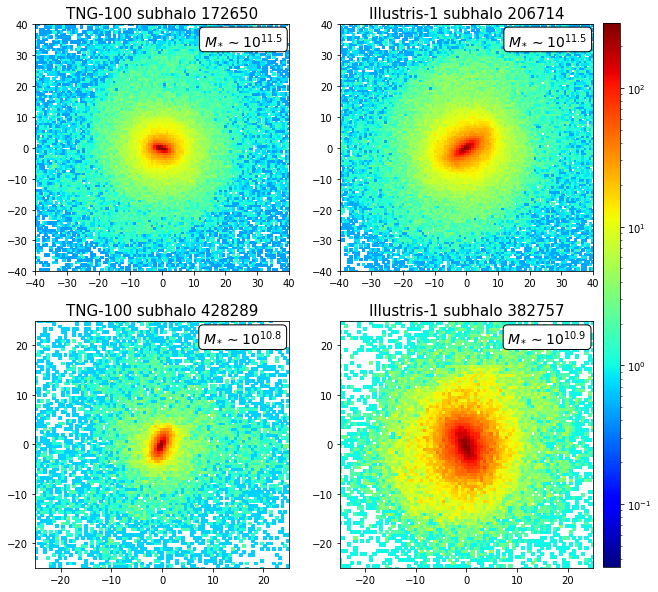

In [69]:
fig1()

In [101]:
def plotBar_4(tng1, tng2, il11, il12):
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    coor = coorInfo('TNG', 99, tng1)
    myBins = 150
    ax[0][0].hist2d(coor[::2, 0], coor[::2, 1], myBins, norm=LogNorm(0.035), cmap='jet')
    ax[0][0].set_title('TNG-100 subhalo %d' % tng1, fontsize=15)
    ax[0][0].annotate(r'$A_{2,max} = 0.157$', (1.8, 15.8), xytext = (10, 26), textcoords = 'offset points', bbox = bbox, fontsize=14)
    ax[0][0].set_xlim(-25, 25)
    ax[0][0].set_ylim(-25, 25)

    coor = coorInfo('il1', 135, il11)
    ax[0][1].hist2d(coor[::2, 0], coor[::2, 1], myBins, norm=LogNorm(0.035), cmap='jet')
    ax[0][1].set_title('Illustris-1 subhalo %d' % il11, fontsize=15)
    ax[0][1].annotate(r'$A_{2,max} = 0.172$', (3.8, 31.5), xytext = (10, 26), textcoords = 'offset points', bbox = bbox, fontsize=14)
    ax[0][1].set_xlim(-50, 50)
    ax[0][1].set_ylim(-50, 50)

    coor = coorInfo('TNG', 99, tng2)
    ax[1][0].hist2d(coor[::2, 0], coor[::2, 1], myBins, norm=LogNorm(0.035), cmap='jet')
    ax[1][0].set_title('TNG-100 subhalo %d' % tng2, fontsize=15)
    ax[1][0].annotate(r'$A_{2,max} = 0.163$', (1.4, 10.8), xytext = (7, 15), textcoords = 'offset points', bbox = bbox, fontsize=14)
    ax[1][0].set_xlim(-15, 15)
    ax[1][0].set_ylim(-15, 15)

    coor = coorInfo('il1', 135, il12)
    ll = ax[1][1].hist2d(coor[::2, 0], coor[::2, 1], myBins, norm=LogNorm(0.035), cmap='jet')
    ax[1][1].set_title('Illustris-1 subhalo %d' % il12, fontsize=15)
    ax[1][1].annotate(r'$A_{2,max} = 0.162$', (5.3, 34.66), xytext = (7, 25), textcoords = 'offset points', bbox = bbox, fontsize=14)
    ax[1][1].set_xlim(-55, 55)
    ax[1][1].set_ylim(-55, 55)
    
    axins = inset_axes(ax[1][1],
                   width="10%",  # width = 5% of parent_bbox width
                   height="200%",  # height : 50%
                   loc='lower right',
                   bbox_to_anchor=(0.51, 0, 0.6, 1.1),    #(x, y, wide, height)
                   bbox_transform=ax[1][1].transAxes,
                   borderpad=0,
                   )
    fig.colorbar(ll[3], cax=axins)
#     plt.savefig('/Raid0/zhouzb/local_result/falsePositive_4fig.pdf')
    plt.savefig('./figs/pf_figs.png')

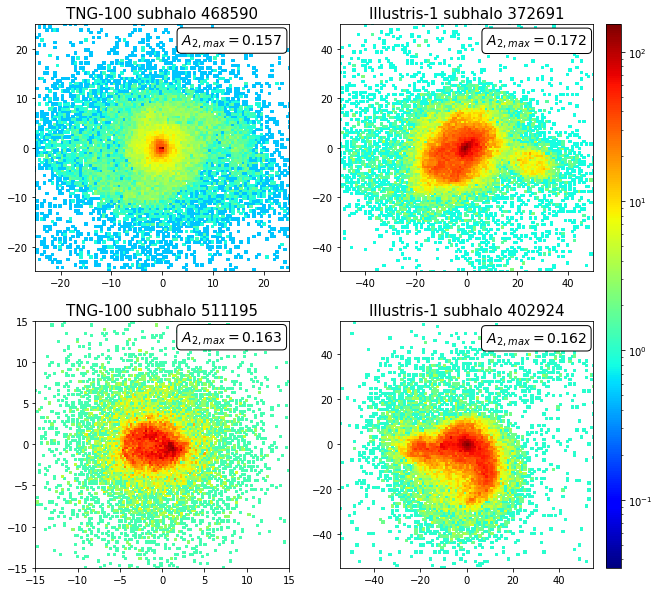

In [102]:
plotBar_4(468590, 511195, 372691, 402924)

In [100]:
def fpfig():
    il1_fp1 = 372691
    il1_fp2 = 402924
    tng_fp1 = 468590
    tng_fp2 = 511195
    
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    coor = coorInfo('TNG', 99, tng_big)
    myBins = 150
    ax[0][0].hist2d(coor[::2, 0], coor[::2, 1], myBins, norm=LogNorm(0.035), cmap='jet')
    ax[0][0].set_title('TNG-100 subhalo %d' % tng_big, fontsize=15)
    ax[0][0].annotate(r'$M_*\sim10^{11.5}$', (10, 25), xytext = (10, 26), textcoords = 'offset points', bbox = bbox, fontsize=14)
    ax[0][0].set_xlim(-40, 40)
    ax[0][0].set_ylim(-40, 40)

    coor = coorInfo('il1', 135, il1_fp1)
    ax[0][1].hist2d(coor[::2, 0], coor[::2, 1], myBins, norm=LogNorm(0.035), cmap='jet')
    ax[0][1].set_title('Illustris-1 subhalo %d' % il1_big, fontsize=15)
    ax[0][1].annotate(r'$M_* \sim 10^{11.5}$', (10, 25), xytext = (10, 26), textcoords = 'offset points', bbox = bbox, fontsize=14)
    ax[0][1].set_xlim(-40, 40)
    ax[0][1].set_ylim(-40, 40)

    coor = coorInfo('TNG', 99, tng_sml)
    ax[1][0].hist2d(coor[::2, 0], coor[::2, 1], myBins, norm=LogNorm(0.035), cmap='jet')
    ax[1][0].set_title('TNG-100 subhalo %d' % tng_sml, fontsize=15)
    ax[1][0].annotate(r'$M_* \sim 10^{10.8}$', (6.7, 17.6), xytext = (7, 15), textcoords = 'offset points', bbox = bbox, fontsize=14)
    ax[1][0].set_xlim(-25, 25)
    ax[1][0].set_ylim(-25, 25)

    coor = coorInfo('il1', 135, tng_fp2)
    ll = ax[1][1].hist2d(coor[::2, 0], coor[::2, 1], myBins, norm=LogNorm(0.035), cmap='jet')
    ax[1][1].set_title('Illustris-1 subhalo %d' % il1_sml, fontsize=15)
    ax[1][1].annotate(r'$M_* \sim 10^{10.9}$', (6.7, 17.6), xytext = (7, 15), textcoords = 'offset points', bbox = bbox, fontsize=14)
    ax[1][1].set_xlim(-25, 25)
    ax[1][1].set_ylim(-25, 25)
    
    axins = inset_axes(ax[1][1],
                   width="10%",  # width = 5% of parent_bbox width
                   height="200%",  # height : 50%
                   loc='lower right',
                   bbox_to_anchor=(1.78, 0.39, 1.1, 1.669),    #(x, y, wide, height)
                   bbox_transform=ax2.transAxes,
                   borderpad=0,
                   )
    fig.colorbar(ll[3], cax=axins)

#     fig.savefig('f:/Linux/result_v2/fig1.pdf')
